In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Datathon-Questions-2024/Q1 - Covid-19-Case-Study/covid_report.csv')
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


In [5]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths'],
      dtype='object')

In [6]:
df.dtypes

UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Date               object
Confirmed           int64
Deaths              int64
dtype: object

In [7]:
# Question 1 : Classify features in the given COVID-19 dataset into corresponding datatypes. Provide a rationale for your classification

In [8]:
# Classification of COVID-19 Dataset columns by data type
data_types = {
    'UID': 'Nominal',
    'iso2': 'Nominal',
    'iso3': 'Nominal',
    'code3' : 'Nominal',
    'FIPS': 'Nominal',  #numeric, but has not true zero nor math operations
    'Admin2': 'Nominal',
    'Province_State': 'Nominal',
    'Country_Region': 'Nominal',
    'Lat': 'Ratio',         #true zero exists, and math operations make sense
    'Long_': 'Ratio',
    'Combined_Key': 'Nominal',
    'Date': 'Interval',
    'Confirmed': 'Ratio',
    'Deaths': 'Ratio'
}

# Displaying the data type classifications
data_types


{'UID': 'Nominal',
 'iso2': 'Nominal',
 'iso3': 'Nominal',
 'code3': 'Nominal',
 'FIPS': 'Nominal',
 'Admin2': 'Nominal',
 'Province_State': 'Nominal',
 'Country_Region': 'Nominal',
 'Lat': 'Ratio',
 'Long_': 'Ratio',
 'Combined_Key': 'Nominal',
 'Date': 'Interval',
 'Confirmed': 'Ratio',
 'Deaths': 'Ratio'}

In [9]:
''' Question 2 : A summary statistic provides a numerical summary of a specific feature within the dataset.
There are two commonly used categories of summary statistics: those that indicate the
central tendency and those that indicate the spread of the data. Identify the most appropriate
measure of central tendency for each attribute in the dataset and state its corresponding
value. Additionally, calculate the standard deviation and range of values for each column '''

' Question 2 : A summary statistic provides a numerical summary of a specific feature within the dataset.\nThere are two commonly used categories of summary statistics: those that indicate the\ncentral tendency and those that indicate the spread of the data. Identify the most appropriate\nmeasure of central tendency for each attribute in the dataset and state its corresponding\nvalue. Additionally, calculate the standard deviation and range of values for each column '

In [10]:
numerical_columns = ['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths']
summary_stats = df[numerical_columns].describe()
summary_stats

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


In [11]:
''' Question 3 : Identify and describe any data quality issues or inconsistencies within the COVID - 19 dataset.
What steps would you take to clean and preprocess the data to ensure its accuracy and
reliability for further analysis?
'''

' Question 3 : Identify and describe any data quality issues or inconsistencies within the COVID - 19 dataset.\nWhat steps would you take to clean and preprocess the data to ensure its accuracy and\nreliability for further analysis?\n'

In [12]:
df.isnull().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

In [13]:
''' FIPS is numeric variable whereas Admin2 is categorical variable
=> proportion of null values in both columns w.r.t whole dataset is quite small
=> can be imputed to capture features gracefully, or can even be dropped'''

' FIPS is numeric variable whereas Admin2 is categorical variable\n=> proportion of null values in both columns w.r.t whole dataset is quite small\n=> can be imputed to capture features gracefully, or can even be dropped'

In [14]:
df['FIPS'].fillna(df['FIPS'].median(), inplace=True)


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_56413/786328848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FIPS'].fillna(df['FIPS'].median(), inplace=True)


In [15]:
df['Admin2'].fillna(df['Admin2'].mode()[0], inplace=True)


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_56413/3982764197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Admin2'].fillna(df['Admin2'].mode()[0], inplace=True)


In [16]:
df.isnull().sum() #successfully cleaned

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64

In [17]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,Unassigned,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,Unassigned,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,Unassigned,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,31014.0,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,31014.0,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,31014.0,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,31014.0,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


In [18]:
df.duplicated().sum() #no duplicates so completely cleaned

0

In [19]:
'''Question 4 :
Plot histogram and box plot for 'Confirmed' and 'Deaths' variables. From this,
i) Identify the type of distribution each of the variables follow
(Hint : limit scale of visualisations for both histograms and box plots)
ii) Identify number of outliers for each variable
iii) Explain how you identified presence of outliers and how to overcome the same


Bonus question : After identifying type of distribution followed by both variables, try to plot a new histogram and boxplot for 'confirmed' variable after correcting any anomalies noticed in your visualisations
(Hint : Try to rescale histogram and box plot according to distribution noticed from previous visualisation)'''

"Question 4 :\nPlot histogram and box plot for 'Confirmed' and 'Deaths' variables. From this,\ni) Identify the type of distribution each of the variables follow\n(Hint : limit scale of visualisations for both histograms and box plots)\nii) Identify number of outliers for each variable\niii) Explain how you identified presence of outliers and how to overcome the same\n\n\nBonus question : After identifying type of distribution followed by both variables, try to plot a new histogram and boxplot for 'confirmed' variable after correcting any anomalies noticed in your visualisations\n(Hint : Try to rescale histogram and box plot according to distribution noticed from previous visualisation)"

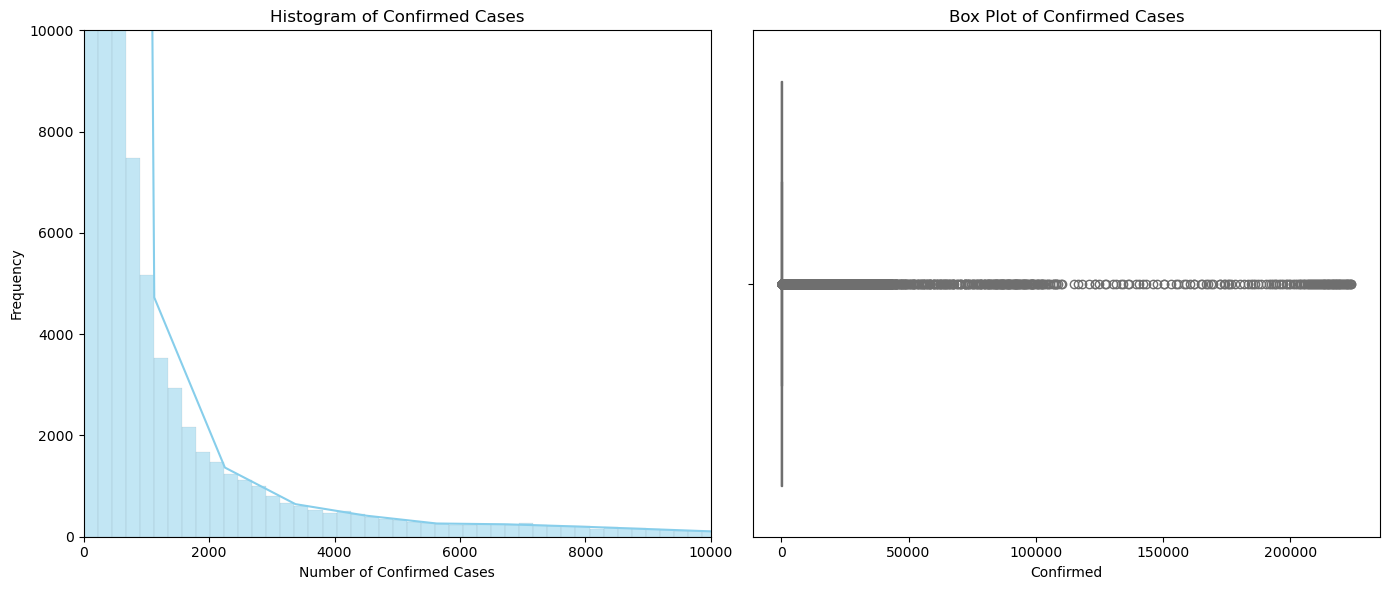

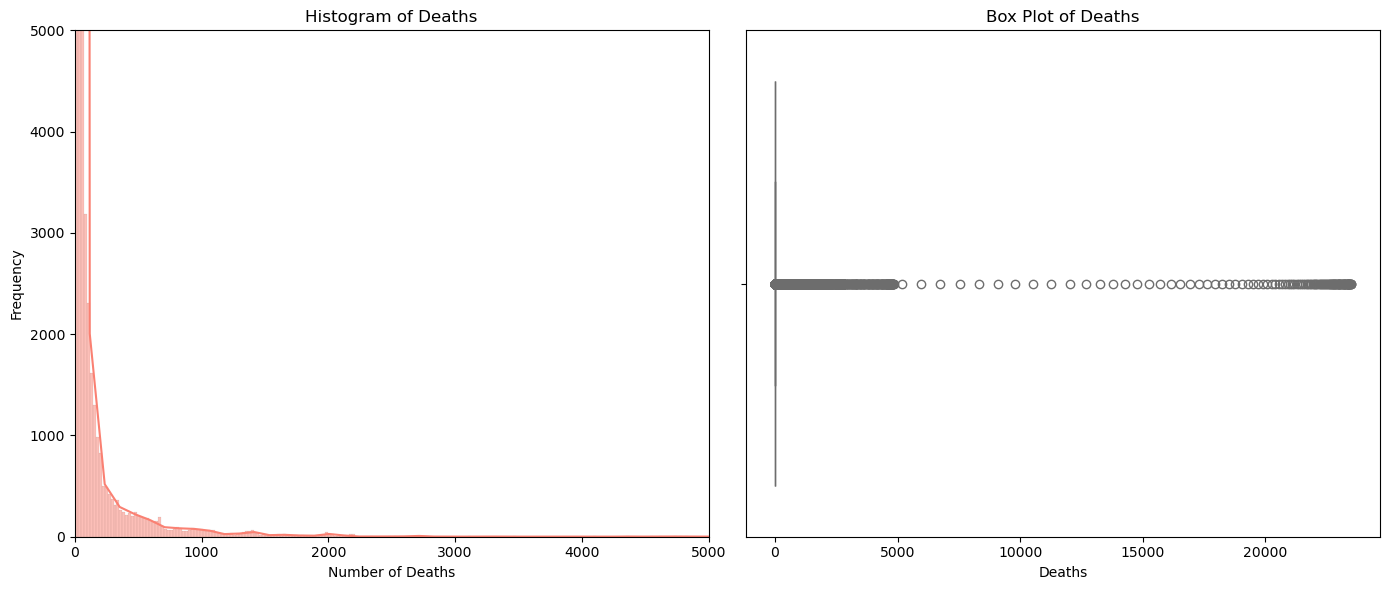

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set x-axis limits
confirmed_xlim = (0, 10000)  # Adjust the upper limit based on your data
deaths_xlim = (0, 5000)       # Adjust the upper limit based on your data
confirmed_ylim = (0, 10000)  # Adjust the upper limit based on your data
deaths_ylim = (0, 5000)       # Adjust the upper limit based on your data

# Histogram and box plot for 'Confirmed'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Confirmed'], kde=True, color='skyblue', edgecolor='black', bins=1000)
plt.title('Histogram of Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Frequency')
plt.xlim(confirmed_xlim)  # Set x-axis limits for confirmed cases
plt.ylim(confirmed_ylim)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Confirmed'], color='skyblue')
plt.title('Box Plot of Confirmed Cases')

plt.tight_layout()  # Adjust layout before showing
plt.show()

# Histogram and box plot for 'Deaths'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Deaths'], kde=True, color='salmon', edgecolor='black', bins=1000)
plt.title('Histogram of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.xlim(deaths_xlim)  # Set x-axis limits for deaths
plt.ylim(deaths_ylim)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Deaths'], color='salmon')
plt.title('Box Plot of Deaths')

plt.tight_layout()  # Adjust layout before showing
plt.show()


In [21]:
# i) Both the variables clearly follow log distribution

In [22]:
#ii) To find number of outliers in both variables

# Calculate IQR for Confirmed
Q1_confirmed = df['Confirmed'].quantile(0.25)
Q3_confirmed = df['Confirmed'].quantile(0.75)
IQR_confirmed = Q3_confirmed - Q1_confirmed

# Identify outliers for Confirmed
outliers_confirmed = df[(df['Confirmed'] < (Q1_confirmed - 1.5 * IQR_confirmed)) | 
                         (df['Confirmed'] > (Q3_confirmed + 1.5 * IQR_confirmed))]

print(f"Number of outliers in Confirmed: {len(outliers_confirmed)}")

# Calculate IQR for Deaths
Q1_deaths = df['Deaths'].quantile(0.25)
Q3_deaths = df['Deaths'].quantile(0.75)
IQR_deaths = Q3_deaths - Q1_deaths

# Identify outliers for Deaths
outliers_deaths = df[(df['Deaths'] < (Q1_deaths - 1.5 * IQR_deaths)) | 
                      (df['Deaths'] > (Q3_deaths + 1.5 * IQR_deaths))]

print(f"Number of outliers in Deaths: {len(outliers_deaths)}")


Number of outliers in Confirmed: 102558
Number of outliers in Deaths: 123811


In [23]:
''' iii) Bonus question solution : 
Previous visualisations follow log distribution, so after applying log transformation, the data gets normalised
and we can get our conventional histograms and box plots from them'''

' iii) Bonus question solution : \nPrevious visualisations follow log distribution, so after applying log transformation, the data gets normalised\nand we can get our conventional histograms and box plots from them'

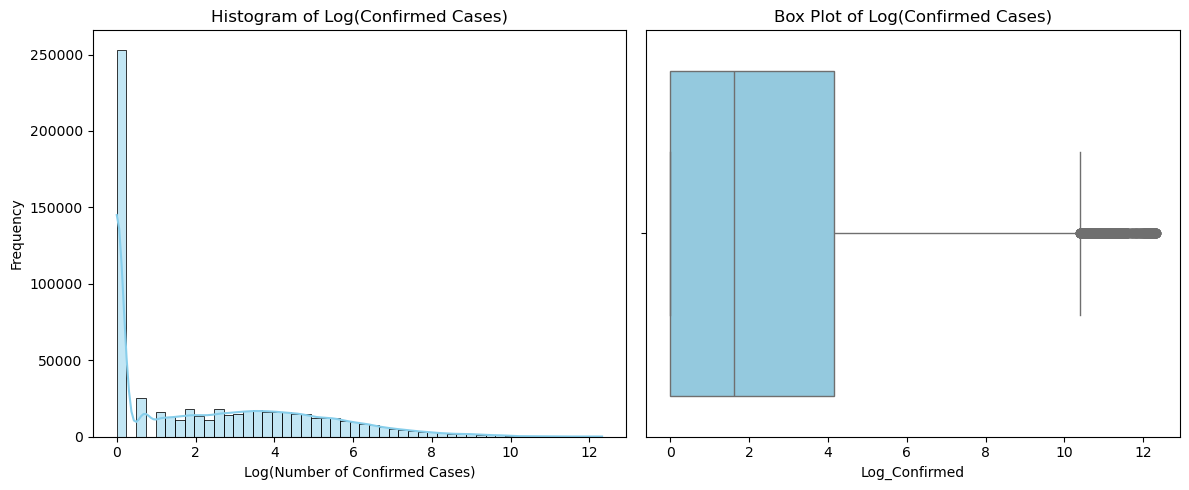

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


log_df = df

# Apply log transformation to 'Confirmed' and 'Deaths'
log_df['Log_Confirmed'] = np.log1p(log_df['Confirmed'])  # log(Confirmed + 1)
log_df['Log_Deaths'] = np.log1p(log_df['Deaths'])  # log(Deaths + 1)

# Histogram and box plot for 'Log_Confirmed'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(log_df['Log_Confirmed'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Log(Confirmed Cases)')
plt.xlabel('Log(Number of Confirmed Cases)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=log_df['Log_Confirmed'], color='skyblue')
plt.title('Box Plot of Log(Confirmed Cases)')

plt.tight_layout()
plt.show()

In [25]:
# 5) Answer : Number and presence of outliers are identified using IQR formula rule
# We can't necessarily remove all the outliers, as real-life data have lot of outliers, and removing them causes data loss

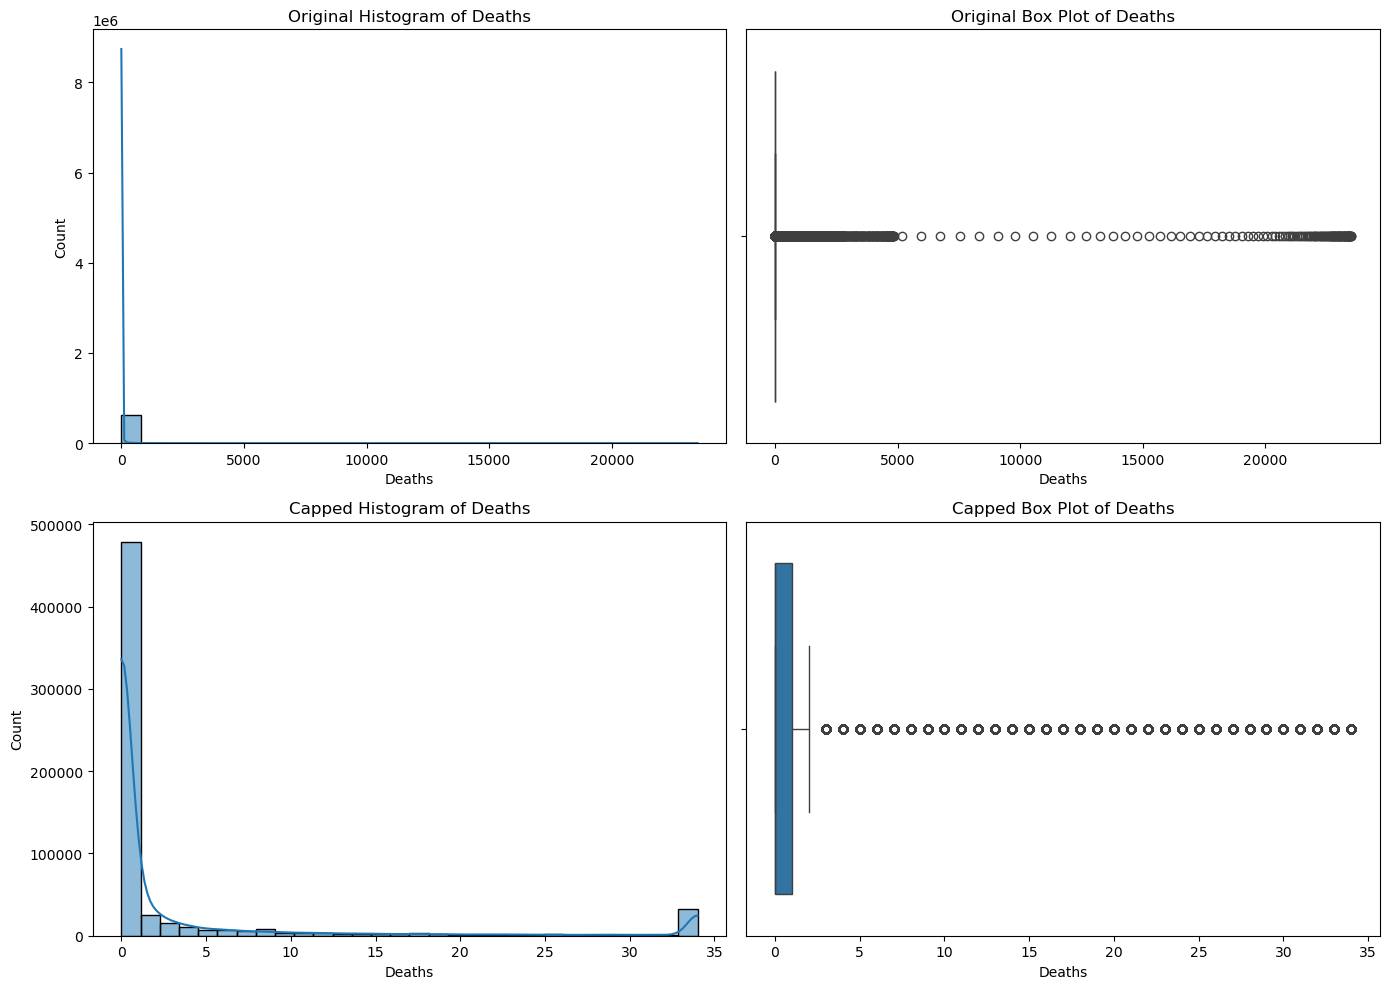

In [26]:
#5 Alternate solution : to cap at 95th percentile
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to cap outliers
def cap_outliers(df, column, percentile=95):
    cap_value = df[column].quantile(percentile / 100)
    df[column] = df[column].clip(upper=cap_value)
    return df

# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create copies of the original DataFrame for capping and removing outliers
df_capped = df.copy()

# Cap outliers in 'Deaths' and 'Confirmed'
df_capped = cap_outliers(df_capped, 'Deaths', percentile=95)
df_capped = cap_outliers(df_capped, 'Confirmed', percentile=95)

# Visualization with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Deaths Histogram and Boxplot
sns.histplot(df['Deaths'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Histogram of Deaths')
sns.boxplot(x=df['Deaths'], ax=axes[0, 1])
axes[0, 1].set_title('Original Box Plot of Deaths')

# Capped Deaths Histogram and Boxplot
sns.histplot(df_capped['Deaths'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capped Histogram of Deaths')
sns.boxplot(x=df_capped['Deaths'], ax=axes[1, 1])
axes[1, 1].set_title('Capped Box Plot of Deaths')

plt.tight_layout()
plt.show()


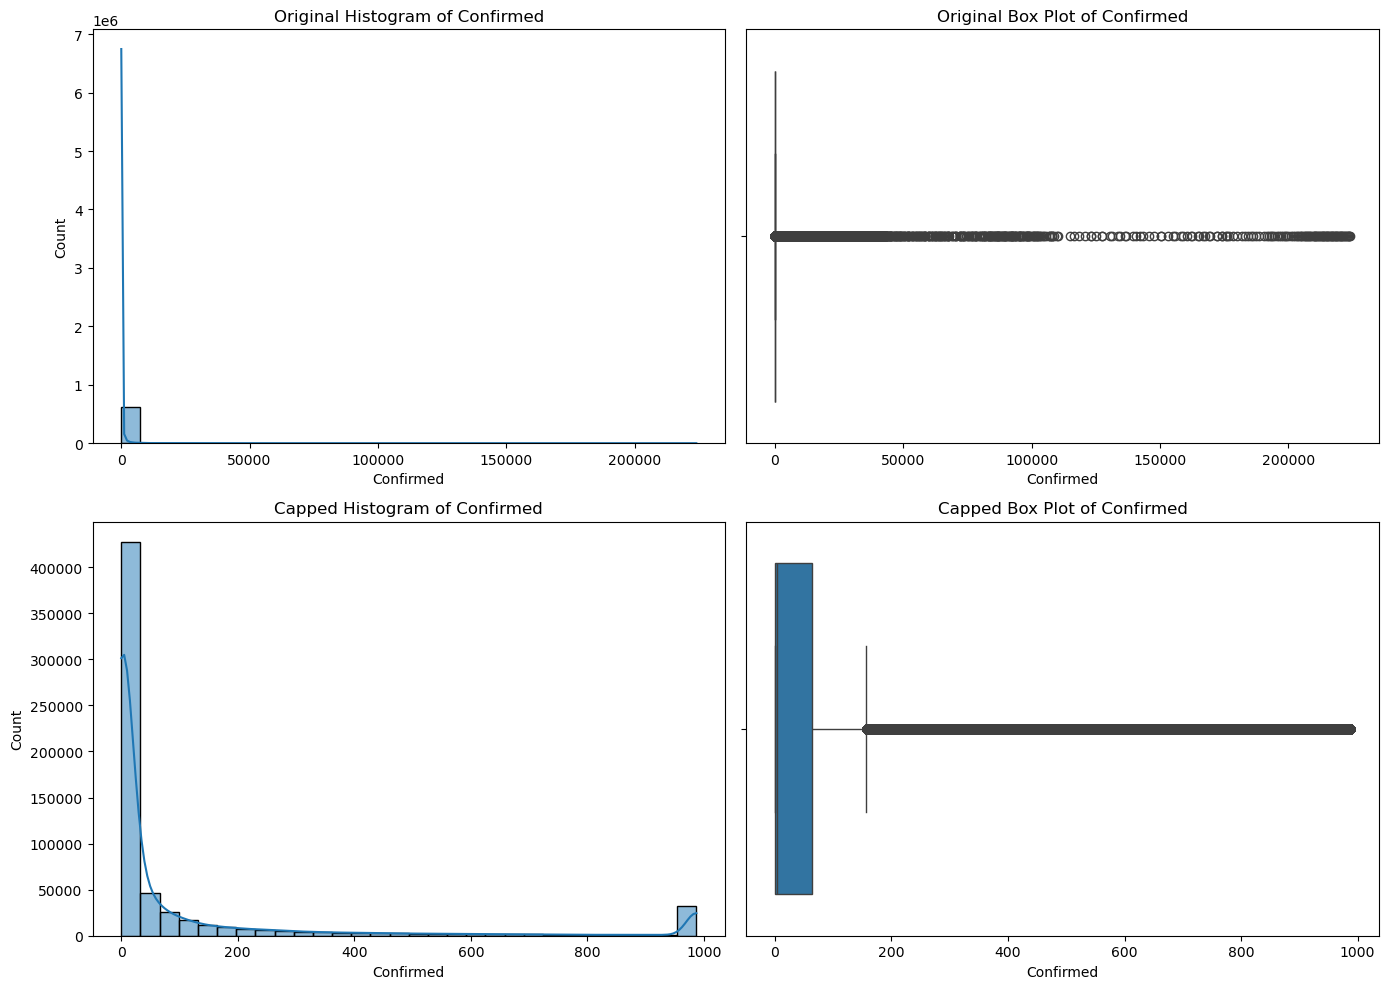

In [27]:
# Visualization with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Confirmed Histogram and Boxplot
sns.histplot(df['Confirmed'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Histogram of Confirmed')
sns.boxplot(x=df['Confirmed'], ax=axes[0, 1])
axes[0, 1].set_title('Original Box Plot of Confirmed')

# Capped Confirmed Histogram and Boxplot
sns.histplot(df_capped['Confirmed'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capped Histogram of Confirmed')
sns.boxplot(x=df_capped['Confirmed'], ax=axes[1, 1])
axes[1, 1].set_title('Capped Box Plot of Confirmed')

plt.tight_layout()
plt.show()

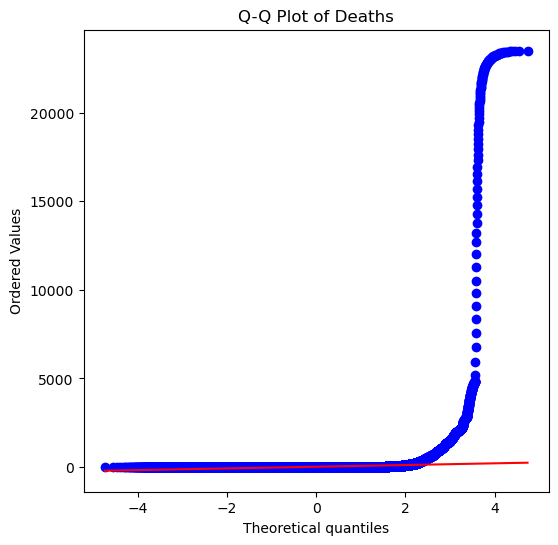

In [28]:
# 6) A Q-Q plot can help evaluate if Deaths follows a normal distribution.
# If the data points roughly follow a straight line, then Deaths is likely normally distributed.
# Deviations suggest skewness or other non-normal characteristics.

import scipy.stats as stats

# Q-Q Plot for 'Deaths' using norm distribution
plt.figure(figsize=(6, 6))
stats.probplot(df['Deaths'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Deaths")
plt.show()


In [29]:
# => clearly, Deaths doesn't follow normal distribution

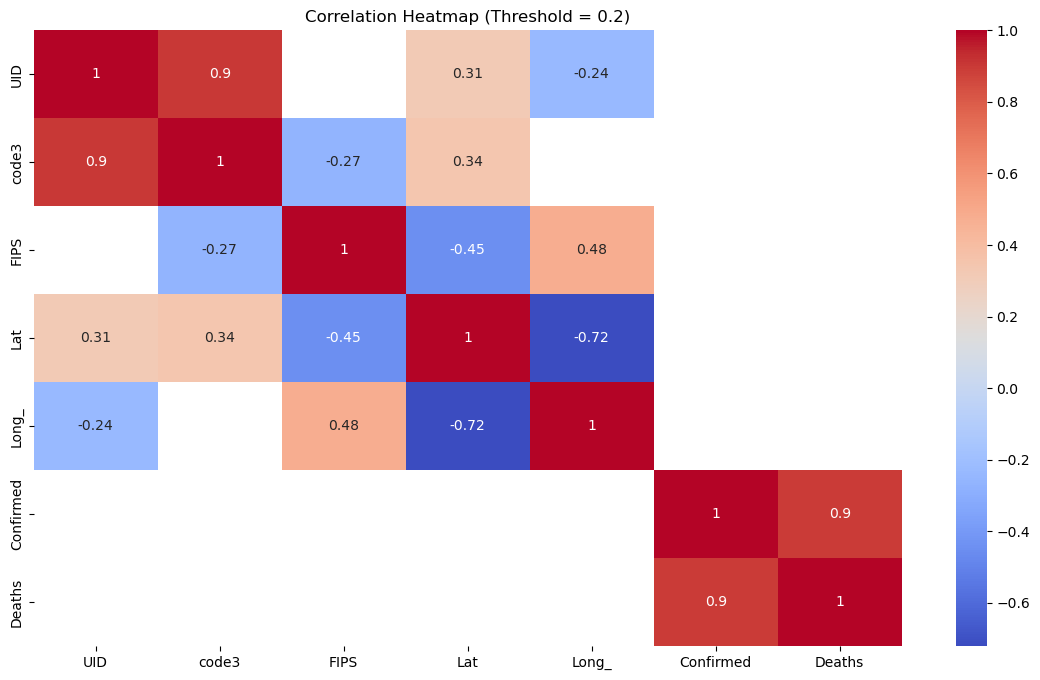

In [30]:
# 7 Answer

# Correlation calculation for Deaths with other numerical variables
correlations = df[['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths']].corr()

# Setting a threshold for visualization
threshold = 0.2
filtered_corr = correlations[(correlations > threshold) | (correlations < -threshold)]

# Heatmap of correlations above threshold
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Correlation Heatmap (Threshold = 0.2)")
plt.show()


In [31]:
# => clearly, Deaths has highest correlation with Confirmed

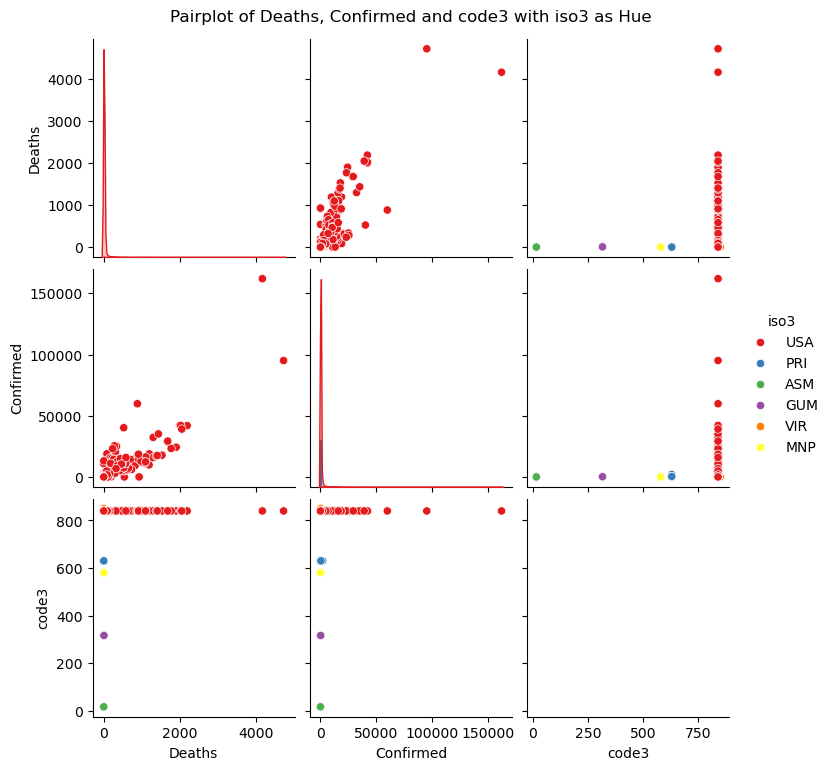

In [32]:
# 8
sampled_df = df.sample(n=10000, random_state=42)

# Generating the pairplot
sns.pairplot(sampled_df, vars=['Deaths', 'Confirmed', 'code3'], hue='iso3', palette="Set1")
plt.suptitle("Pairplot of Deaths, Confirmed and code3 with iso3 as Hue", y=1.02)
plt.show()

In [33]:
'''Insights from pairplot :
* The diagonal of the pairplot shows the distribution of each variable
* The off-diagonal plots show scatter plots of the pairs of variables
* Clustering by Hue: The hue variable ('iso3') allows you to visualize 
how different countries (or regions) are distributed within these relationships'''

"Insights from pairplot :\n* The diagonal of the pairplot shows the distribution of each variable\n* The off-diagonal plots show scatter plots of the pairs of variables\n* Clustering by Hue: The hue variable ('iso3') allows you to visualize \nhow different countries (or regions) are distributed within these relationships"

In [34]:
'''Insights from visualisations till now : 
* Outliers: Adjusted with capping, making distributions more robust.
* Q-Q Plot: Indicates normality, skewness, or kurtosis for Deaths.
* Correlation Heatmap: Highlights relationships above the threshold, guiding feature selection.
* Pairplot: Shows how Deaths, Confirmed and code3 relate to iso3, identifying key patterns for analysis.'''

'Insights from visualisations till now : \n* Outliers: Adjusted with capping, making distributions more robust.\n* Q-Q Plot: Indicates normality, skewness, or kurtosis for Deaths.\n* Correlation Heatmap: Highlights relationships above the threshold, guiding feature selection.\n* Pairplot: Shows how Deaths, Confirmed and code3 relate to iso3, identifying key patterns for analysis.'

In [35]:
'''9)
Null Hypothesis (H0): There is no significant difference in the median number of deaths associated with different levels of confirmed cases 
(i.e., the median number of deaths is equal across different groups of confirmed cases).

Alternative Hypothesis (H1): There is a significant difference in the median number of deaths associated with different levels of confirmed cases 
(i.e., the median number of deaths is not equal across different groups of confirmed cases).

'''

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# create two groups based on a threshold of confirmed cases(say, median)
threshold = df['Confirmed'].median()
deaths_below_threshold= df[df['Confirmed'] < threshold]['Deaths']
deaths_above_threshold = df[df['Confirmed'] >= threshold]['Deaths']

#T-test
t_stat, p_value = stats.ttest_ind(deaths_below_threshold, deaths_above_threshold, nan_policy='omit')
print(f'T-statistic: {t_stat}, P-value: {p_value}')

#check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant impact.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact.")



T-statistic: -44.08378063670481, P-value: 0.0
Reject the null hypothesis: There is a significant impact.


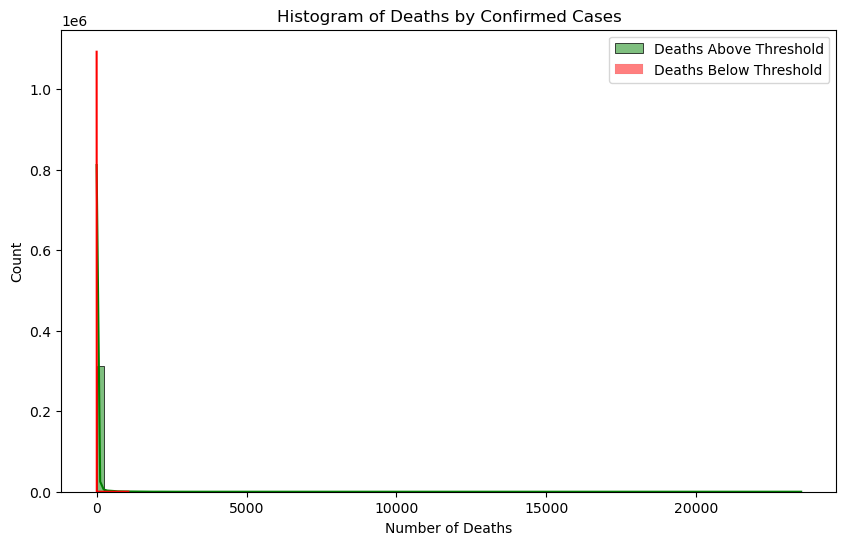

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram of Deaths by Confirmed Cases
plt.figure(figsize=(10, 6))
sns.histplot(deaths_above_threshold, color='green', label='Deaths Above Threshold', kde=True, bins=100)
sns.histplot(deaths_below_threshold, color='red', label='Deaths Below Threshold', kde=True, bins=100)
plt.legend()
plt.xlabel('Number of Deaths')
plt.title('Histogram of Deaths by Confirmed Cases')
plt.show()


In [37]:
# 10)
# The margin of error provides an estimate of the precision of our sample mean difference between Deaths for those who were confirmed and those who didn’t.
# We can calculate it using the standard error and critical value (for a 95% confidence level).

import numpy as np
import scipy.stats as stats

# Calculate standard error of the mean difference
n_above_threshold = len(deaths_above_threshold.dropna())
n_below_threshold = len(deaths_below_threshold.dropna())
std_above_threshold = deaths_above_threshold.std()
std_below_threshold = deaths_below_threshold.std()

# Pooled standard deviation and margin of error
pooled_std = np.sqrt((std_above_threshold ** 2 / n_above_threshold) + (std_below_threshold** 2 / n_below_threshold))
critical_value = stats.t.ppf(1 - alpha / 2, df=n_above_threshold + n_below_threshold - 2)
margin_of_error = critical_value * pooled_std

print("Margin of Error:", margin_of_error)


# If the T-test shows a p-value below 0.05, we conclude that the difference in deaths who were confirmed and those who weren't is significant.
# The margin of error helps quantify this difference's precision. A smaller margin suggests a more precise estimate.

Margin of Error: 1.4547140856178205


Root Mean Squared Error: 130.69969791691983
Mean Squared Error: 17082.4110355741
R-squared: 0.7060790675319188


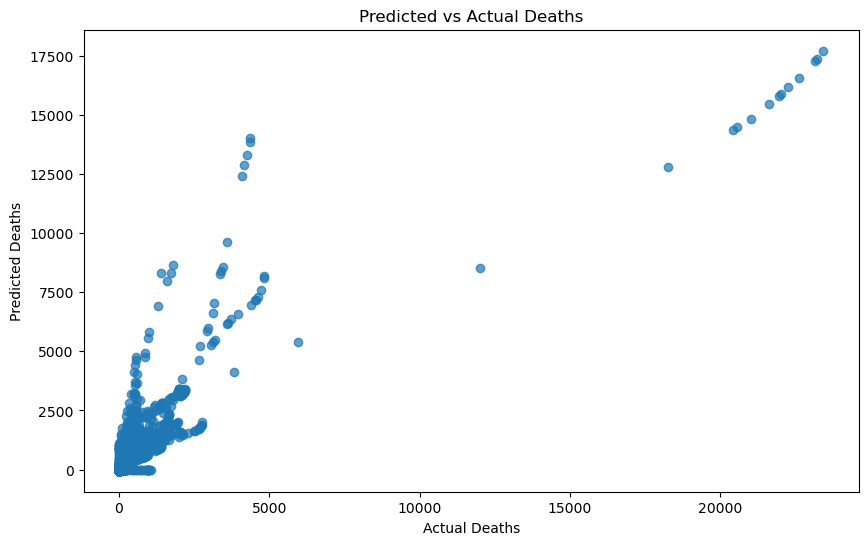

In [38]:
# 11

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target variable
features = df[['code3', 'FIPS', 'Lat', 'Long_', 'Confirmed']]
target = df['Deaths']

# Handling missing values by filling with median (basic imputation)
features = features.fillna(features.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Predicted vs Actual Deaths")
plt.show()


# The R-squared value will indicate how well the features explain the variability in deaths.
# A higher R-squared means a better fit.
# The plot of actual versus predicted values helps visualize this fit.

In [39]:
'''Question 12 : 
Given the variables 'code3', 'FIPS', 'Lat', 'Long_', and 'Confirmed', which represent geographical and case-related 
information, what additional features could be engineered from these variables to improve the prediction of 'Deaths'? 
For instance, consider how combining or transforming these variables could reveal new insights into the spread and 
severity of the pandemic. Give 2 such feature aggregations for the same.'''

'''Answer:

1) Region-Based Aggregation: Grouping 'code3' and 'FIPS' by regions (e.g., state, province, or metropolitan 
area) could help in analyzing deaths by region-specific characteristics, as some areas might have higher or 
lower mortality rates due to healthcare access or population density.

Distance to Epicenter: Using 'Lat' and 'Long_', calculate the distance from known pandemic epicenters (like Wuhan or New 
York City). This distance could reveal if proximity to an outbreak center impacted death rates.'''

"Answer:\n\n1) Region-Based Aggregation: Grouping 'code3' and 'FIPS' by regions (e.g., state, province, or metropolitan \narea) could help in analyzing deaths by region-specific characteristics, as some areas might have higher or \nlower mortality rates due to healthcare access or population density.\n\nDistance to Epicenter: Using 'Lat' and 'Long_', calculate the distance from known pandemic epicenters (like Wuhan or New \nYork City). This distance could reveal if proximity to an outbreak center impacted death rates."